<a href="https://colab.research.google.com/github/Mushfiq12696/AI_projects/blob/main/Clustering_Influenza_A_protein_Sequence_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.4-py3-none-any.whl size=16678 sha256=1146de6953dc62b3b8401c9f8daac0d20f1c42b693ce89d4d16b9c7322038831
  Stored in directory: /root/.cache/pip/wheels/62/1e/e7/f9ee096e5cc02890a6934a5670ff6e45a3400f330605bd8210
Successfully built pandarallel


In [ ]:
pip install fastatocsv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandarallel  # required library for multiprocessing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

In [ ]:
from tensorflow.keras.layers import Flatten,Embedding,Dense

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
pip install sgt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sgt
sgt.__version__
from sgt import SGT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
import matplotlib as mpl
import itertools
import seaborn as sns
%matplotlib inline

In [ ]:
import fasta2csv.converter
data=fasta2csv.converter.convert("/content/FASTA(1).fa","new_data1.csv")0

In [ ]:
df = pd.read_csv('/content/new_data1.csv')

In [ ]:
df.head()

,Properties,Sequence
0,AVP08348 Human H1N1 PB2,MERIKELRDLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...
1,AVP08352 Human H1N1,MKAILVVLLYTFXTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...
2,AVP08365 Human H1N1 NA,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVNHSIQIGNQSQI...
3,AVP06268 Human H3N2 NA,MNPNQKIITIGSVSLTISTICFFMQIAILITTVTLHFKQYEFNSPT...
4,AVP06269 Human H3N2 NS1,MDSNTVSSFQVDCFLWHIRKQVVDQKLSDAPFLDRLRRDQRSLRGR...


In [ ]:
df[["Properties"]]

,Properties
0,AVP08348 Human H1N1 PB2
1,AVP08352 Human H1N1
2,AVP08365 Human H1N1 NA
3,AVP06268 Human H3N2 NA
4,AVP06269 Human H3N2 NS1
...,...
4494,QCT08222 Human H1N1 NA
4495,QCT08357 Human H1N1 PA
4496,QCT08358 Human H1N1
4497,QCT08118 Human H1N1


In [ ]:
df[['Accession','Host','SubType','P_Name']] = df.Properties.str.split(" ", expand = True)

In [ ]:
df.head()

,Properties,Sequence,Accession,Host,SubType,P_Name
0,AVP08348 Human H1N1 PB2,MERIKELRDLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...,AVP08348,Human,H1N1,PB2
1,AVP08352 Human H1N1,MKAILVVLLYTFXTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,AVP08352,Human,H1N1,
2,AVP08365 Human H1N1 NA,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVNHSIQIGNQSQI...,AVP08365,Human,H1N1,NA
3,AVP06268 Human H3N2 NA,MNPNQKIITIGSVSLTISTICFFMQIAILITTVTLHFKQYEFNSPT...,AVP06268,Human,H3N2,NA
4,AVP06269 Human H3N2 NS1,MDSNTVSSFQVDCFLWHIRKQVVDQKLSDAPFLDRLRRDQRSLRGR...,AVP06269,Human,H3N2,NS1


In [ ]:
new_data = df.drop(['Properties'],axis =1)

In [ ]:
new_data

,Sequence,Accession,Host,SubType,P_Name
0,MERIKELRDLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...,AVP08348,Human,H1N1,PB2
1,MKAILVVLLYTFXTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,AVP08352,Human,H1N1,
2,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVNHSIQIGNQSQI...,AVP08365,Human,H1N1,NA
3,MNPNQKIITIGSVSLTISTICFFMQIAILITTVTLHFKQYEFNSPT...,AVP06268,Human,H3N2,NA
4,MDSNTVSSFQVDCFLWHIRKQVVDQKLSDAPFLDRLRRDQRSLRGR...,AVP06269,Human,H3N2,NS1
...,...,...,...,...,...
4494,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQSQI...,QCT08222,Human,H1N1,NA
4495,MEDFVRQCFNPMIVELAEKAMKEYGEDPKIETNKFAAICTHLEVCF...,QCT08357,Human,H1N1,PA
4496,MEDFVRQCFNPMIVELAEKAMKEYGEDPKIETNKFAAICTHLEVCF...,QCT08358,Human,H1N1,
4497,MKAILVVLLYTFTTAKADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,QCT08118,Human,H1N1,


In [ ]:
df[["SubType"]]

,SubType
0,H1N1
1,H1N1
2,H1N1
3,H3N2
4,H3N2
...,...
4494,H1N1
4495,H1N1
4496,H1N1
4497,H1N1


In [ ]:
subtype = df[["SubType"]]

In [ ]:
subtype.value_counts()

SubType
H1N1       2096
H3N2       2029
H9N2         83
H3N1         28
H4N6         26
H11N9        25
H3           23
H5N3         21
H3N8         20
H5N2         16
H1           14
             14
H7N3         13
H4N8         12
H6N1         12
H5N6         11
H10N7        10
H2N3          9
H7N9          8
H10N3         8
H1N3          7
H14N5         7
H6N6          6
N2            1
dtype: int64

In [ ]:
new_data = df.drop(['Properties','Accession','Host','P_Name',],axis =1)
new_data.head()

,Sequence,SubType
0,MERIKELRDLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...,H1N1
1,MKAILVVLLYTFXTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,H1N1
2,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVNHSIQIGNQSQI...,H1N1
3,MNPNQKIITIGSVSLTISTICFFMQIAILITTVTLHFKQYEFNSPT...,H3N2
4,MDSNTVSSFQVDCFLWHIRKQVVDQKLSDAPFLDRLRRDQRSLRGR...,H3N2


In [ ]:
new_data[["SubType"]]

,SubType
0,H1N1
1,H1N1
2,H1N1
3,H3N2
4,H3N2
...,...
4494,H1N1
4495,H1N1
4496,H1N1
4497,H1N1


In [ ]:
options = ['H1N1','H3N2','H9N2','H3N1']
df_filtered = new_data[new_data['SubType'].isin(options)]
df_filtered

,Sequence,SubType
0,MERIKELRDLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...,H1N1
1,MKAILVVLLYTFXTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,H1N1
2,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVNHSIQIGNQSQI...,H1N1
3,MNPNQKIITIGSVSLTISTICFFMQIAILITTVTLHFKQYEFNSPT...,H3N2
4,MDSNTVSSFQVDCFLWHIRKQVVDQKLSDAPFLDRLRRDQRSLRGR...,H3N2
...,...,...
4494,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQSQI...,H1N1
4495,MEDFVRQCFNPMIVELAEKAMKEYGEDPKIETNKFAAICTHLEVCF...,H1N1
4496,MEDFVRQCFNPMIVELAEKAMKEYGEDPKIETNKFAAICTHLEVCF...,H1N1
4497,MKAILVVLLYTFTTAKADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,H1N1


In [ ]:
df_filtered[["SubType"]].value_counts()

SubType
H1N1       2096
H3N2       2029
H9N2         83
H3N1         28
dtype: int64

In [ ]:
new_data = df_filtered
new_data

,Sequence,SubType
0,MERIKELRDLMSQSRTREILTKTTVDHMAIIKKYTSGRQEKNPALR...,H1N1
1,MKAILVVLLYTFXTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,H1N1
2,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVNHSIQIGNQSQI...,H1N1
3,MNPNQKIITIGSVSLTISTICFFMQIAILITTVTLHFKQYEFNSPT...,H3N2
4,MDSNTVSSFQVDCFLWHIRKQVVDQKLSDAPFLDRLRRDQRSLRGR...,H3N2
...,...,...
4494,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQSQI...,H1N1
4495,MEDFVRQCFNPMIVELAEKAMKEYGEDPKIETNKFAAICTHLEVCF...,H1N1
4496,MEDFVRQCFNPMIVELAEKAMKEYGEDPKIETNKFAAICTHLEVCF...,H1N1
4497,MKAILVVLLYTFTTAKADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,H1N1


In [ ]:
n = new_data[['SubType']]

In [ ]:
n.value_counts()

SubType
H1N1       2096
H3N2       2029
H9N2         83
H3N1         28
dtype: int64

In [ ]:
X = df[' Sequence']
def split(word):
  return [char for char in word]
sequences = [split(x) for x in X]

In [ ]:
new_data = new_data.loc[:,['SubType',' Sequence']]
new_data.columns = ['id', 'sequence']
new_data['sequence'] = new_data['sequence'].map(list)
new_data

,id,sequence
0,H1N1,"[M, E, R, I, K, E, L, R, D, L, M, S, Q, S, R, ..."
1,H1N1,"[M, K, A, I, L, V, V, L, L, Y, T, F, X, T, A, ..."
2,H1N1,"[M, N, P, N, Q, K, I, I, T, I, G, S, I, C, M, ..."
3,H3N2,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."
4,H3N2,"[M, D, S, N, T, V, S, S, F, Q, V, D, C, F, L, ..."
...,...,...
4494,H1N1,"[M, N, P, N, Q, K, I, I, T, I, G, S, I, C, M, ..."
4495,H1N1,"[M, E, D, F, V, R, Q, C, F, N, P, M, I, V, E, ..."
4496,H1N1,"[M, E, D, F, V, R, Q, C, F, N, P, M, I, V, E, ..."
4497,H1N1,"[M, K, A, I, L, V, V, L, L, Y, T, F, T, T, A, ..."


In [ ]:
embedding_df = Sequential()
embedding_layer = Embedding(input_dim=20,output_dim=2,input_length=2)
embedding_df.add(embedding_layer)
embedding_df.add(Flatten())
embedding_df.add(Dense(1,activation='sigmoid'))
embedding_df.compile(optimizer='adam',loss='binary_crossentropy')


In [ ]:
%%time
#Applying Deep Embedding network

sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(new_data)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
CPU times: user 3.49 s, sys: 601 ms, total: 4.09 s
Wall time: 7min 48s


In [ ]:
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

,"(A, A)","(A, B)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, J)",...,"(Z, P)","(Z, Q)","(Z, R)","(Z, S)","(Z, T)","(Z, V)","(Z, W)","(Z, X)","(Z, Y)","(Z, Z)"
id,,,,,,,,,,,,,,,,,,,,,
H1N1,0.002613,0.0,2.230682e-04,0.001886,0.000674,0.000126,0.001363,0.000009,0.002608,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1N1,0.002575,0.0,1.914635e-03,0.004121,0.001469,0.002068,0.003050,0.000537,0.003818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1N1,0.005229,0.0,3.760094e-03,0.000304,0.001469,0.000132,0.001056,0.002740,0.001132,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H3N2,0.001689,0.0,7.188875e-05,0.004292,0.001883,0.006529,0.002131,0.001945,0.002176,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H3N2,0.000951,0.0,3.119208e-14,0.000624,0.002392,0.018316,0.002793,0.015037,0.016618,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H1N1,0.005926,0.0,3.760094e-03,0.000320,0.000015,0.000048,0.001056,0.002740,0.001128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1N1,0.001258,0.0,2.457181e-03,0.001680,0.001951,0.000186,0.000405,0.000359,0.002509,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1N1,0.005137,0.0,7.150674e-03,0.006612,0.002952,0.000059,0.000209,0.000953,0.006634,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
y = new_data.iloc[:,0].astype('category').values
X=pca.transform(sgtembedding_df)
print(np.sum(pca.explained_variance_ratio_))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.6033493762999114


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
X

array([[-3.08618259e-02, -1.89303872e-02],
       [-2.94743403e-02, -1.30198415e-02],
       [-2.46411571e-02, -1.28885525e-02],
       ...,
       [-2.42929671e-03,  5.43692655e-04],
       [-3.00703472e-02, -1.30679183e-02],
       [ 7.43521717e-01, -1.19410849e-01]])

In [ ]:
y.value_counts()

H1N1    2096
H3N1      28
H3N2    2029
H9N2      83
dtype: int64

In [ ]:
df = pd.DataFrame(data=X, columns=['x1','x2'])
df['class'] = y
df

,x1,x2,class
0,-0.030862,-0.018930,H1N1
1,-0.029474,-0.013020,H1N1
2,-0.024641,-0.012889,H1N1
3,-0.022898,-0.012760,H3N2
4,-0.003883,-0.008616,H3N2
...,...,...,...
4231,-0.024878,-0.012355,H1N1
4232,-0.032135,-0.016176,H1N1
4233,-0.002429,0.000544,H1N1
4234,-0.030070,-0.013068,H1N1


<Figure size 1000x1000 with 0 Axes>

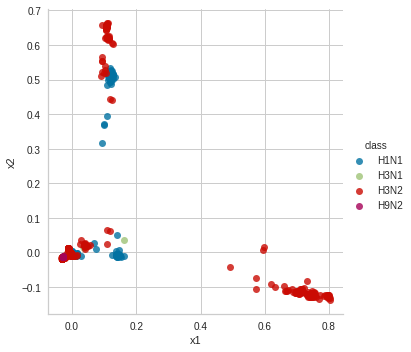

In [ ]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=df, x="x1", y="x2", fit_reg=False, hue='class')
plt.show()

In [ ]:
new_df = df[["x1","x2"]]
new_df

,x1,x2
0,-0.030862,-0.018930
1,-0.029474,-0.013020
2,-0.024641,-0.012889
3,-0.022898,-0.012760
4,-0.003883,-0.008616
...,...,...
4231,-0.024878,-0.012355
4232,-0.032135,-0.016176
4233,-0.002429,0.000544
4234,-0.030070,-0.013068


In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(new_df)


KMeans(n_clusters=4, random_state=0)

In [ ]:
labels = kmeans.predict(new_df)
labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
new_df

In [ ]:
X

array([[-3.08618259e-02, -1.89303872e-02],
       [-2.94743403e-02, -1.30198415e-02],
       [-2.46411571e-02, -1.28885525e-02],
       ...,
       [-2.42929671e-03,  5.43692655e-04],
       [-3.00703472e-02, -1.30679183e-02],
       [ 7.43521717e-01, -1.19410849e-01]])

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

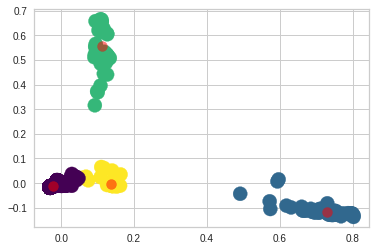

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=200, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

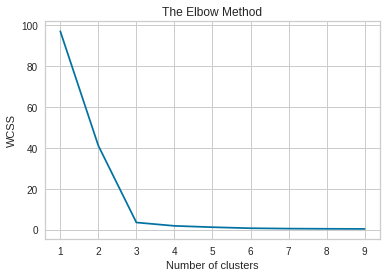

In [ ]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

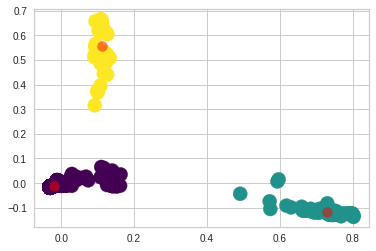

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=200, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

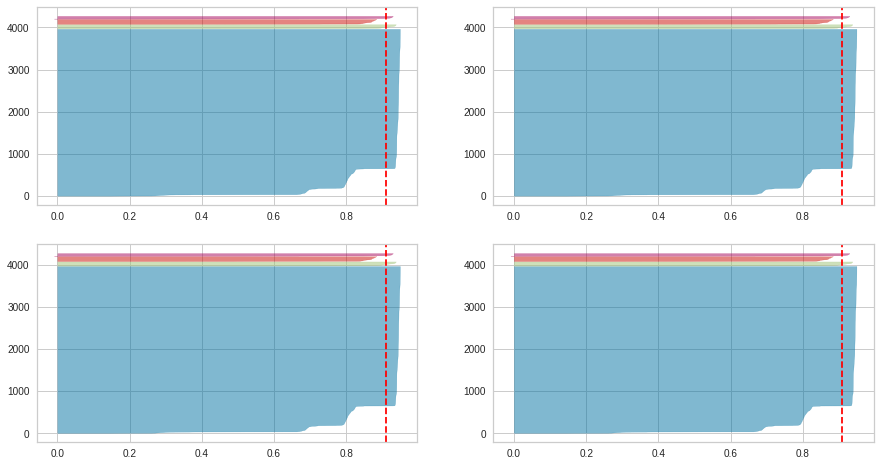

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)